In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc, accuracy_score, mean_squared_error, classification_report, confusion_matrix
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_fscore_support
from sklearn.calibration import CalibratedClassifierCV
import lightgbm as lgbm
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, Normalizer
from yellowbrick.model_selection.importances import FeatureImportances
import scikitplot as skplt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import set_dataset as k
import importlib
importlib.reload(k)

<module 'set_dataset' from '/Users/kelvin/GAMES/src/set_dataset.py'>

In [53]:
from ngboost.ngboost import NGBoost
from ngboost.distns import Bernoulli
from ngboost.learners import default_tree_learner
from ngboost.scores import MLE

In [54]:
db = pd.read_csv('db_coef350_xgb100.csv')
x = db.iloc[:, :-1]
y = db.iloc[:, -1]
print(x.shape)
print(y.shape)
print(f'Percentage of Majority Class: {round(y[y==0].count() / y.shape[0]*100, 2)}%')
print(f'Percentage of Minority Class: {round(y[y==1].count() / y.shape[0]*100, 2)}%')
y.value_counts()

(27075, 100)
(27075,)
Percentage of Majority Class: 86.43%
Percentage of Minority Class: 13.57%


0    23401
1     3674
Name: y, dtype: int64

In [59]:
models = {'Light GBM': lgbm.LGBMClassifier(),
          'Natural Gradient Boosting': NGBoost(Base=default_tree_learner, Dist=Bernoulli, Score=MLE(),
                  verbose=True),
          'XGBoost': XGBClassifier(),
          'Logistic Regression': LogisticRegression(solver='lbfgs'),
          'Random Forest': RandomForestClassifier(), 
          'Gaussian Naive Bayes': GaussianNB(),
          'Decision Tree': DecisionTreeClassifier()}

In [61]:
importlib.reload(k)
model_scores, models_fitted, scaled_instance = k.fit_predict_KFold(x, y, models, RandomOverSampler())

[iter 0] loss=0.6931 val_loss=0.0000 scale=1.0000 norm=0.5000
[iter 100] loss=0.6146 val_loss=0.0000 scale=1.0000 norm=0.4565
[iter 200] loss=0.5637 val_loss=0.0000 scale=1.0000 norm=0.4227
[iter 300] loss=0.5303 val_loss=0.0000 scale=1.0000 norm=0.3974
[iter 400] loss=0.5059 val_loss=0.0000 scale=1.0000 norm=0.3781
[iter 0] loss=0.4897 val_loss=0.0000 scale=1.0000 norm=0.3637
[iter 100] loss=0.4751 val_loss=0.0000 scale=1.0000 norm=0.3507
[iter 200] loss=0.4633 val_loss=0.0000 scale=1.0000 norm=0.3403
[iter 300] loss=0.4536 val_loss=0.0000 scale=1.0000 norm=0.3318
[iter 400] loss=0.4459 val_loss=0.0000 scale=1.0000 norm=0.3247
[iter 0] loss=0.4404 val_loss=0.0000 scale=1.0000 norm=0.3193
[iter 100] loss=0.4335 val_loss=0.0000 scale=1.0000 norm=0.3129
[iter 200] loss=0.4277 val_loss=0.0000 scale=1.0000 norm=0.3078
[iter 300] loss=0.4227 val_loss=0.0000 scale=1.0000 norm=0.3033
[iter 400] loss=0.4182 val_loss=0.0000 scale=1.0000 norm=0.2992
[iter 0] loss=0.4125 val_loss=0.0000 scale=1.0

In [62]:
importlib.reload(k)
k.metrics_KF(model_scores)

                           Precision  Recall  F-Score  ROC-AUC
Light GBM                       0.51    0.81     0.62     0.84
Natural Gradient Boosting       0.46    0.79     0.58     0.82
XGBoost                         0.47    0.81     0.60     0.83
Logistic Regression             0.46    0.72     0.56     0.80
Random Forest                   0.67    0.53     0.59     0.75
Gaussian Naive Bayes            0.69    0.37     0.48     0.67
Decision Tree                   0.48    0.50     0.49     0.71


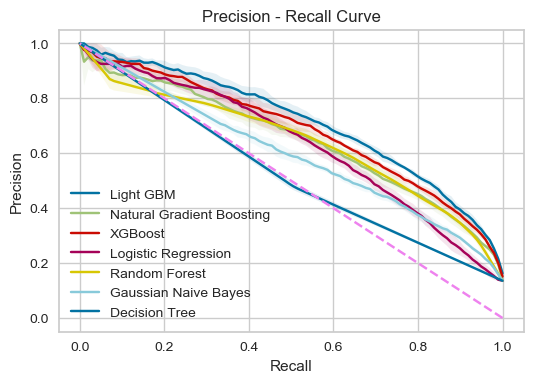

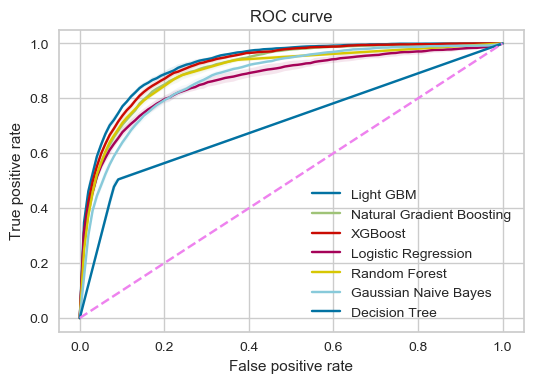

In [65]:
importlib.reload(k)
k.curves_KF(model_scores, models_fitted)

                      Precision  Recall  F-Score  ROC-AUC
Light GBM                  0.54    0.78     0.63     0.84
XGBoost                    0.50    0.77     0.61     0.83
Logistic Regression        0.49    0.68     0.57     0.79
Random Forest              0.66    0.54     0.60     0.75
Gaussian Naive Bayes       0.69    0.37     0.49     0.67
Decision Tree              0.48    0.49     0.48     0.70


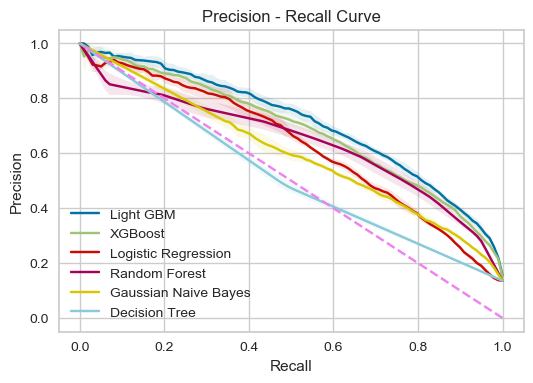

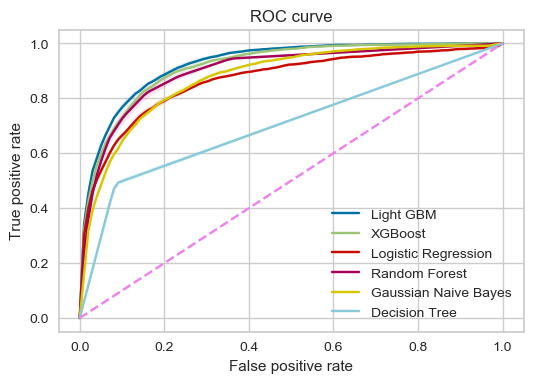

In [20]:
# Threshold 0.55
importlib.reload(k)
model_scores, models_fitted, scaled_instance = k.fit_predict_KFold(x, y, models, RandomOverSampler(), 0.55)
importlib.reload(k)
k.metrics_KF(model_scores)
importlib.reload(k)
k.curves_KF(model_scores, models_fitted)

                      Precision  Recall  F-Score  ROC-AUC
Light GBM                  0.57    0.75     0.64     0.83
XGBoost                    0.52    0.74     0.61     0.82
Logistic Regression        0.54    0.64     0.58     0.78
Random Forest              0.73    0.42     0.54     0.70
Gaussian Naive Bayes       0.69    0.38     0.49     0.67
Decision Tree              0.50    0.50     0.50     0.71


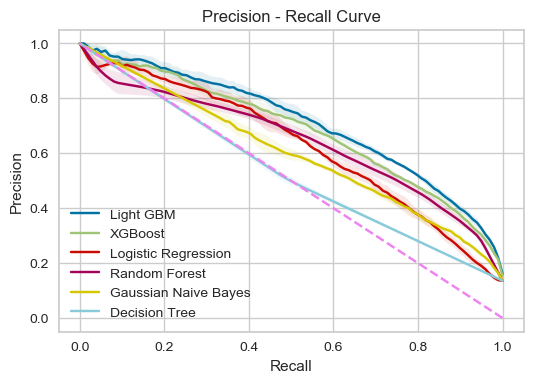

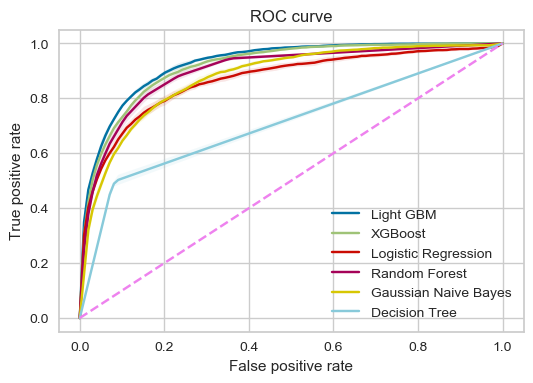

In [21]:
# Threshold 0.60
importlib.reload(k)
model_scores, models_fitted, scaled_instance = k.fit_predict_KFold(x, y, models, RandomOverSampler(), 0.60)
importlib.reload(k)
k.metrics_KF(model_scores)
importlib.reload(k)
k.curves_KF(model_scores, models_fitted)

                      Precision  Recall  F-Score  ROC-AUC
Light GBM                  0.60    0.71     0.65     0.82
XGBoost                    0.56    0.71     0.63     0.81
Logistic Regression        0.57    0.61     0.59     0.77
Random Forest              0.73    0.42     0.53     0.70
Gaussian Naive Bayes       0.69    0.37     0.49     0.67
Decision Tree              0.48    0.49     0.49     0.70


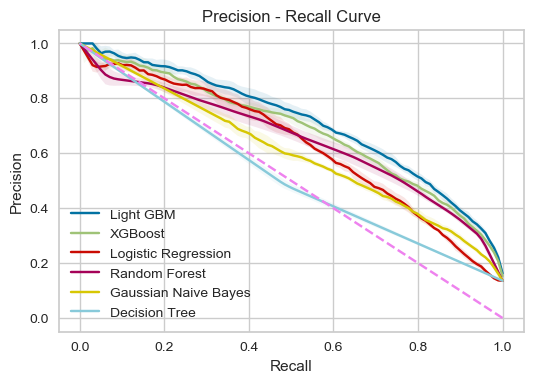

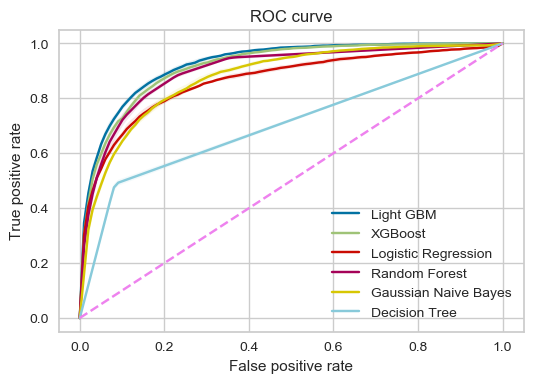

In [22]:
# Threshold 0.65
importlib.reload(k)
model_scores, models_fitted, scaled_instance = k.fit_predict_KFold(x, y, models, RandomOverSampler(), 0.65)
importlib.reload(k)
k.metrics_KF(model_scores)
importlib.reload(k)
k.curves_KF(model_scores, models_fitted)

                      Precision  Recall  F-Score  ROC-AUC
Light GBM                  0.64    0.66     0.65     0.80
XGBoost                    0.60    0.66     0.63     0.80
Logistic Regression        0.61    0.56     0.58     0.75
Random Forest              0.79    0.30     0.43     0.64
Gaussian Naive Bayes       0.69    0.37     0.48     0.67
Decision Tree              0.48    0.48     0.48     0.70


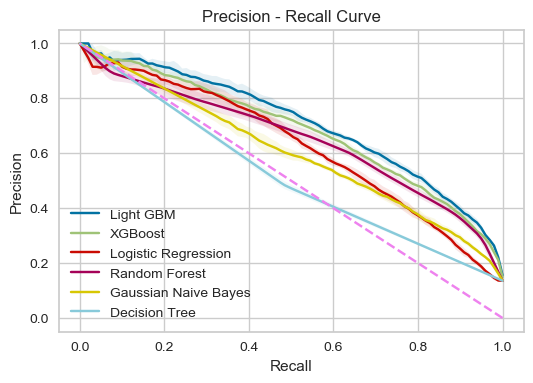

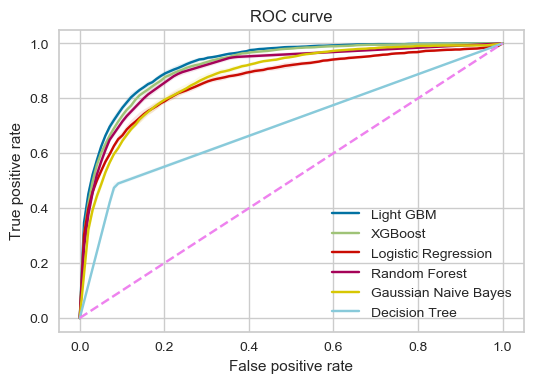

In [23]:
# Threshold 0.70
importlib.reload(k)
model_scores, models_fitted, scaled_instance = k.fit_predict_KFold(x, y, models, RandomOverSampler(), 0.70)
importlib.reload(k)
k.metrics_KF(model_scores)
importlib.reload(k)
k.curves_KF(model_scores, models_fitted)

                      Precision  Recall  F-Score  ROC-AUC
Light GBM                  0.67    0.62     0.64     0.79
XGBoost                    0.64    0.61     0.63     0.78
Logistic Regression        0.65    0.52     0.58     0.74
Random Forest              0.78    0.30     0.43     0.64
Gaussian Naive Bayes       0.69    0.37     0.48     0.67
Decision Tree              0.49    0.49     0.49     0.70


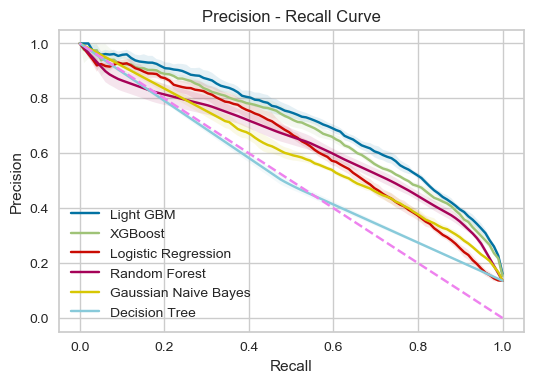

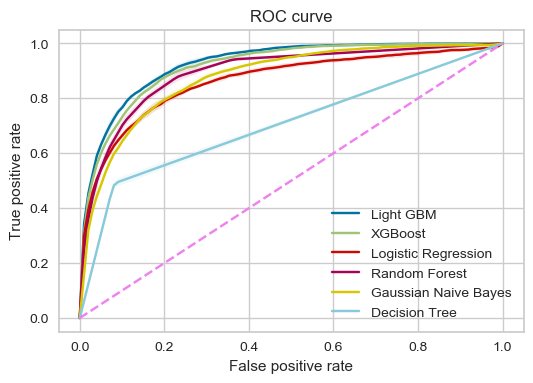

In [24]:
# Threshold 0.75
importlib.reload(k)
model_scores, models_fitted, scaled_instance = k.fit_predict_KFold(x, y, models, RandomOverSampler(), 0.75)
importlib.reload(k)
k.metrics_KF(model_scores)
importlib.reload(k)
k.curves_KF(model_scores, models_fitted)

                      Precision  Recall  F-Score  ROC-AUC
Light GBM                  0.72    0.56     0.62     0.76
XGBoost                    0.68    0.56     0.61     0.76
Logistic Regression        0.68    0.49     0.57     0.73
Random Forest              0.83    0.18     0.30     0.59
Gaussian Naive Bayes       0.69    0.37     0.48     0.67
Decision Tree              0.48    0.49     0.49     0.70


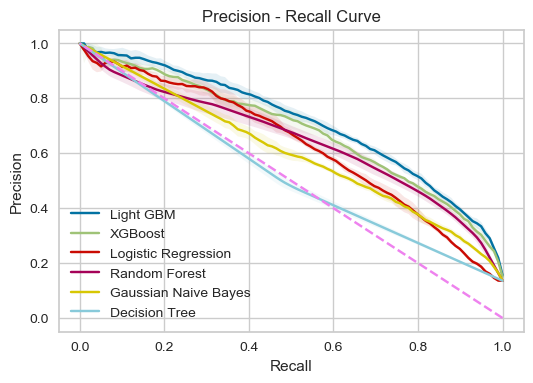

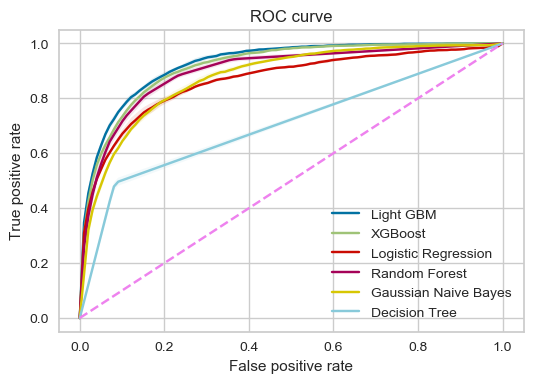

In [25]:
# Threshold 0.80
importlib.reload(k)
model_scores, models_fitted, scaled_instance = k.fit_predict_KFold(x, y, models, RandomOverSampler(), 0.80)
importlib.reload(k)
k.metrics_KF(model_scores)
importlib.reload(k)
k.curves_KF(model_scores, models_fitted)

                      Precision  Recall  F-Score  ROC-AUC
Light GBM                  0.77    0.48     0.59     0.73
XGBoost                    0.73    0.47     0.58     0.72
Logistic Regression        0.72    0.46     0.56     0.71
Random Forest              0.83    0.19     0.30     0.59
Gaussian Naive Bayes       0.69    0.37     0.48     0.67
Decision Tree              0.49    0.50     0.50     0.71


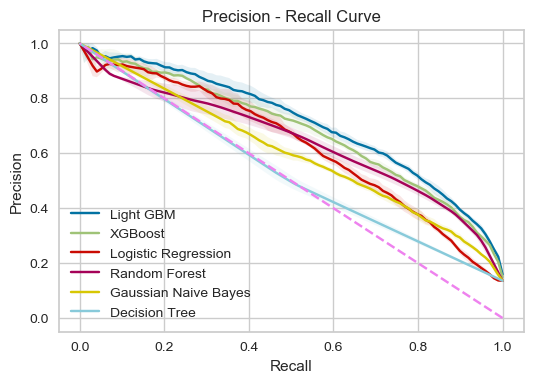

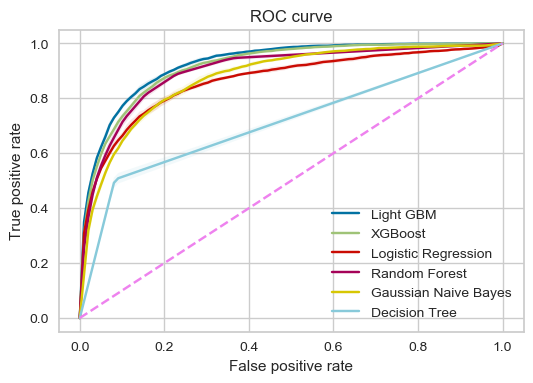

In [26]:
# Threshold 0.85
importlib.reload(k)
model_scores, models_fitted, scaled_instance = k.fit_predict_KFold(x, y, models, RandomOverSampler(), 0.85)
importlib.reload(k)
k.metrics_KF(model_scores)
importlib.reload(k)
k.curves_KF(model_scores, models_fitted)

In [6]:
#params = {'gamma': 0.5, 'learning_rate': 0.4, 'max_depth': 6, 'min_child_weight': 10}
models = {'Light GBM': lgbm.LGBMClassifier(),
          'XGBoost': XGBClassifier(),
          'Logistic Regression': LogisticRegression(solver='lbfgs'),
          'Random Forest': RandomForestClassifier(), 
          'Gaussian Naive Bayes': GaussianNB(),
          'Decision Tree': DecisionTreeClassifier()}
model = XGBClassifier()

# Modeling on Train - Test Best parameters 

In [7]:
model_scores, models_fitted = k.fit_predict_train_test(x,y,models, RandomOverSampler())

In [8]:
importlib.reload(k)
k.metrics_train_test(model_scores)

                      Precision  Recall  F-Score  ROC-AUC
Light GBM                  0.52    0.81     0.63     0.85
XGBoost                    0.49    0.81     0.61     0.84
Logistic Regression        0.43    0.68     0.53     0.77
Random Forest              0.69    0.49     0.57     0.73
Gaussian Naive Bayes       0.69    0.37     0.48     0.67
Decision Tree              0.49    0.48     0.49     0.70


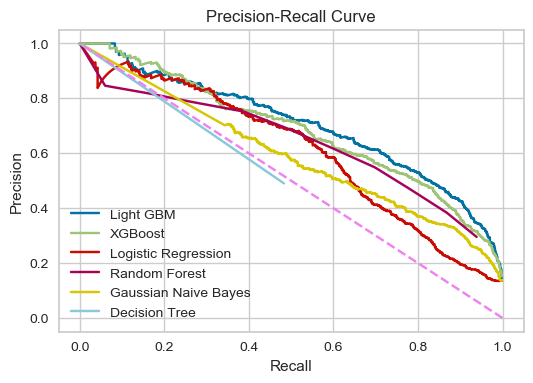

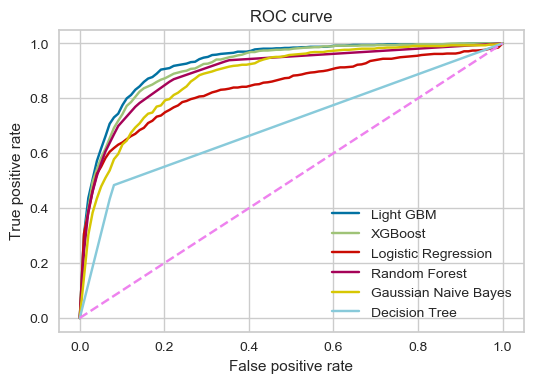

In [9]:
importlib.reload(k)
k.curves_train_test(model_scores, models_fitted)

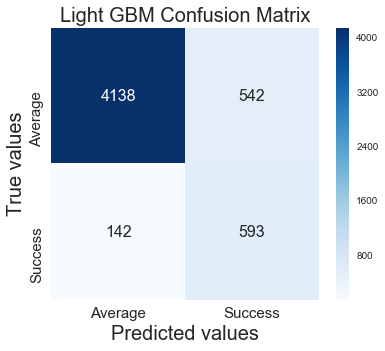

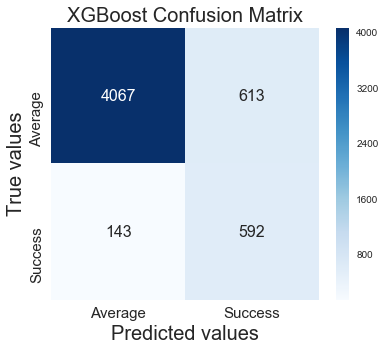

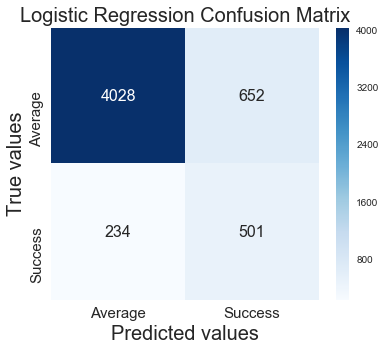

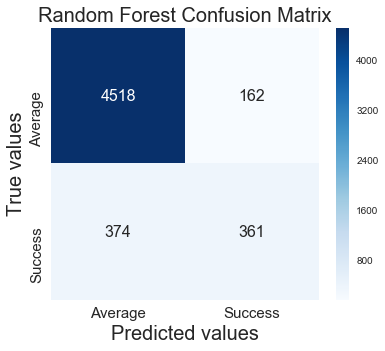

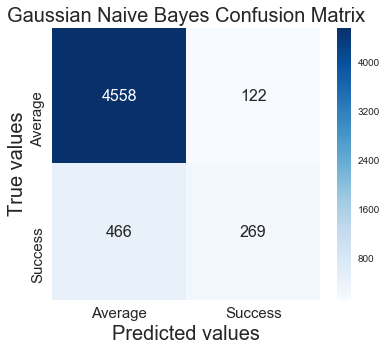

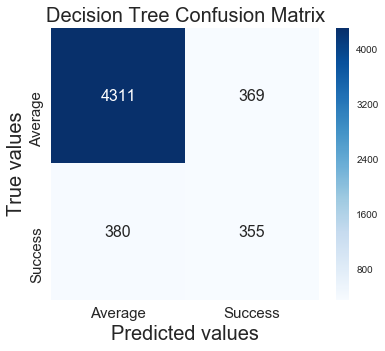

In [10]:
importlib.reload(k)
k.confusion_train_test(model_scores)

In [50]:
model_scores, models_fitted, scaled_instance = k.fit_predict_KFold(x, y, models, RandomOverSampler())

In [51]:
importlib.reload(k)
k.metrics_KF(model_scores)

                      Precision  Recall  F-Score  ROC-AUC
Light GBM                  0.50    0.80     0.62     0.84
XGBoost GridSearch         0.53    0.76     0.62     0.83
XGBoost                    0.47    0.81     0.59     0.83
Logistic Regression        0.48    0.72     0.58     0.80
Random Forest              0.66    0.53     0.59     0.74
Gaussian Naive Bayes       0.68    0.38     0.49     0.68


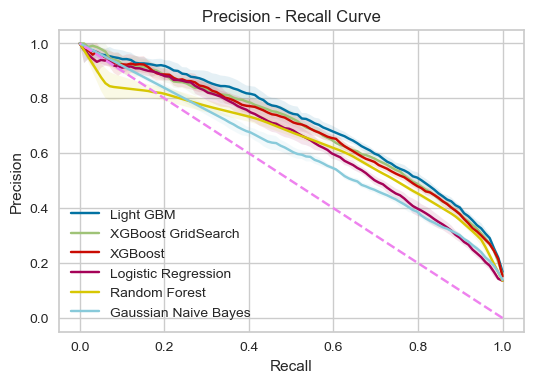

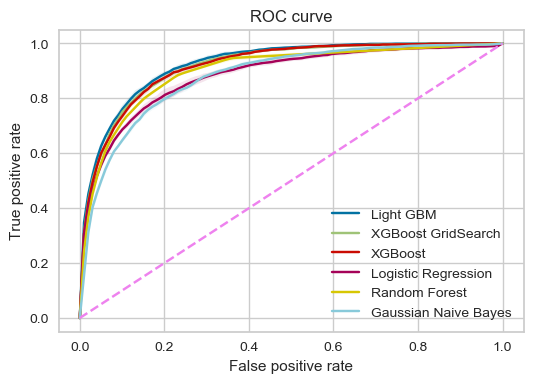

In [52]:
importlib.reload(k)
k.curves_KF(model_scores, models_fitted)